# Visualizing Honeycomb Patterns with Python and Matplotlib

This Python script demonstrates how to create mesmerizing honeycomb patterns using the Matplotlib library. Honeycomb patterns are a common occurrence in nature, seen in the intricate hexagonal structures built by bees in their hives. Inspired by this natural phenomenon, our script generates visually appealing honeycomb displays composed of hexagons arranged in rows.

The script allows for the customization of the honeycomb pattern, including the number of rows and the arrangement of hexagons within each row. By adjusting these parameters, users can create diverse honeycomb designs, ranging from traditional hexagonal grids to more intricate and asymmetrical patterns.

With its simplicity and flexibility, this script serves as a fun and educational tool for exploring the beauty of honeycomb structures and experimenting with geometric patterns in Python.

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx

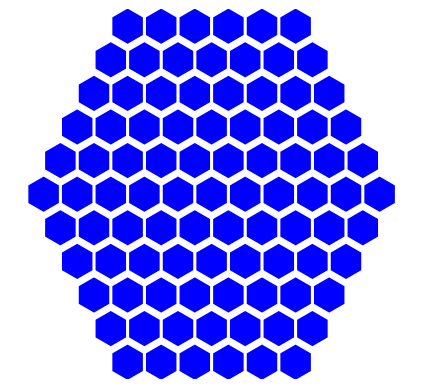

In [2]:
# Define number of rows
num_rows = 11

# Create figure and axis
fig, ax = plt.subplots()

# Loop through each row
for i in range(num_rows):
    # Calculate number of hexagons in the current row
    if i < 6:
        num_hex_row = 6 + i
    else:
        num_hex_row = 16 - i

    # Calculate starting x-coordinate for the row
    start_x = -0.5 * num_hex_row + 0.5

    # Loop through each hexagon in the row
    for j in range(num_hex_row):
        # Calculate x and y coordinates for the hexagon center
        x_center = start_x + j
        y_center = i

        # Create a blue hexagon object with adjusted size
        hexagon = mpatches.RegularPolygon(
            xy=(x_center, y_center), numVertices=6, radius=0.5, color='blue')

        # Add hexagon to the plot
        ax.add_artist(hexagon)

# Set axes limits slightly higher than radius and offset
ax.set_xlim([-6, 6])
ax.set_ylim([-0.5, num_rows - 0.5])

# Set axes
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

plt.show()

The honeycomb layout display generated by this script serves as an engaging and intuitive visualization tool for data storytelling. Each hexagon within the honeycomb represents a certain data value, allowing viewers to quickly grasp the relative size or magnitude of the data being presented. By adjusting the number of rows and the arrangement of hexagons, users can create displays that effectively convey different scales of data. For instance, comparing a honeycomb layout with a larger number of rows to one with fewer rows provides a visual reference for understanding the relative magnitude of different data sets. This dynamic visualization technique enhances the storytelling process by offering an easily interpretable and visually compelling representation of complex data.

## Further experimentation

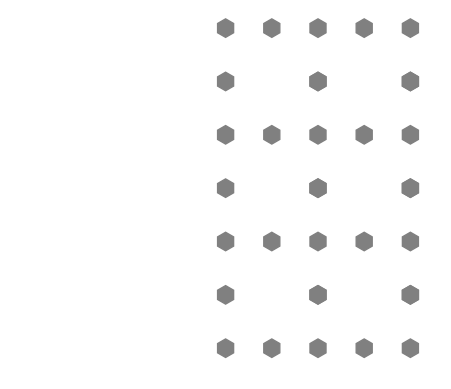

In [7]:
import math 

# Define grid dimensions (adjust as needed)
num_rows = 10
num_cols = 12

# Define hexagon function
def get_hexagon_center(i, j, num_rows, num_cols):
    # Calculate x and y offsets
    x_offset = j + (i % 2) * (j % 2 == 1)
    y_offset = i

    # Convert offset coordinates to pixel coordinates
    x_center = x_offset * 1.5 + num_cols / 2  # Adjust factor as needed
    y_center = y_offset * math.sqrt(3)

    return x_center, y_center

# Create figure and axis
fig, ax = plt.subplots()

# Loop through each row and column
for i in range(num_rows):
    for j in range(num_cols):
        # Calculate x and y coordinates for hexagon center
        x_center, y_center = get_hexagon_center(i, j, num_rows, num_cols)

        # Create a hexagon object (adjust radius and color)
        hexagon = mpatches.RegularPolygon(
            xy=(x_center, y_center), numVertices=6, radius=0.3, color='gray')

        # Add hexagon to the plot
        ax.add_artist(hexagon)

# Set axes limits and aspect ratio
ax.set_xlim([-1, num_cols + 1])
ax.set_ylim([-1, num_rows + 1])
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

plt.show()


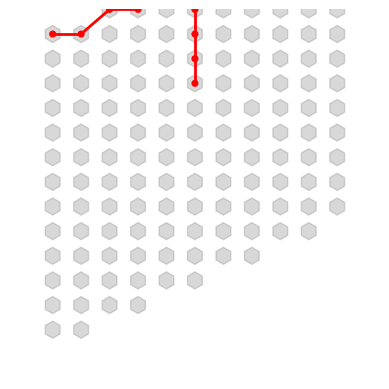

In [15]:

# Create a rectangular grid graph
G = nx.grid_2d_graph(11, 13, periodic=True)  # Increased dimensions for (5, 5, 0)

# Define start and end nodes in 2D coordinates (adjust for periodic boundaries)
start_node = (0, 0)
end_node = (5, 4)  # Adjusted for periodic wrapping

# Implement A* pathfinding algorithm on the grid graph
path = nx.astar_path(G, start_node, end_node)

# Define node positions using a function (adjust as needed)
def get_node_position(node):
    x, y = node
    # Adjusted for periodic boundaries and hexagonal layout
    return (x + 0.5, -(y - x // 2) * math.sqrt(3) / 2)

# Create figure and axis
fig, ax = plt.subplots()

# Draw background hexagons (optional)
for node in G.nodes:
    x, y = get_node_position(node)
    hexagon = mpatches.RegularPolygon(xy=(x, y), numVertices=6, radius=0.3, color='gray', alpha=0.3)
    ax.add_artist(hexagon)

# Highlight path nodes
for node in path:
    x, y = get_node_position(node)
    circle = plt.Circle((x, y), radius=0.1, color='red')
    ax.add_patch(circle)

# Draw lines between path nodes
for i in range(len(path)-1):
    node1, node2 = path[i], path[i+1]
    x1, y1 = get_node_position(node1)
    x2, y2 = get_node_position(node2)
    line = plt.Line2D((x1, x2), (y1, y2), color='red', linewidth=2)
    ax.add_line(line)

# Set axes limits and aspect ratio (adjusted for hexagonal layout)
ax.set_xlim(-1, 12)
ax.set_ylim(-math.sqrt(3) * 7, math.sqrt(3) / 2)
ax.set_aspect('equal')

# Hide axes
ax.axis('off')

plt.show()



We may yet play with further explorations. 